# 快速入门 Pandas 一 常用运算、数据清洗和读写文件

In [1]:
import numpy as np
import pandas as pd

In [3]:
np.__version__, pd.__version__

('1.17.2', '0.25.1')

## 一 常用运算

### 1.1、Python 运算符

运算符 | 方法
:-:|:-
+ | add() |
- | sub(), subtract() |
*   | mul(), multiply() |
/   | truediv(), div(), divide() |
//  | floordiv() |
%   | mod() |
**  | pow() |

In [4]:
# 产生随机数组
rng = np.random.RandomState(888)
rvs = pd.Series(rng.randint(0, 10, 3))
rvs

0    6
1    3
2    7
dtype: int64

In [5]:
# 创建随机二维数组 (3,4)
df1 = pd.DataFrame(rng.randint(0, 10, (3, 4)),columns=['A', 'B', 'C', 'D'])
df1

,A,B,C,D
0,9,1,0,0
1,9,3,0,6
2,3,2,4,1


In [6]:
# 创建随机二维数组 (5,5)
df2 = pd.DataFrame(rng.randint(0, 10, (5, 5)),columns=['A', 'B', 'C', 'D', 'E'])
df2

,A,B,C,D,E
0,7,2,8,6,3
1,8,5,9,4,6
2,9,2,9,1,0
3,2,6,2,1,2
4,1,9,8,4,3


In [7]:
# 两个不同 shape 的 dataframe 直接相加 +
df1 + df2

,A,B,C,D,E
0,16.0,3.0,8.0,6.0,NaN
1,17.0,8.0,9.0,10.0,NaN
2,12.0,4.0,13.0,2.0,NaN
3,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN


In [8]:
# 两个不同 shape 的 dataframe 直接相加 add
df1.add(df2)

,A,B,C,D,E
0,16.0,3.0,8.0,6.0,NaN
1,17.0,8.0,9.0,10.0,NaN
2,12.0,4.0,13.0,2.0,NaN
3,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN


In [9]:
# 两个不同 shape 的 dataframe 直接相加，空值以 0 填充
df1.add(df2, fill_value=0)

,A,B,C,D,E
0,16.0,3.0,8.0,6.0,3.0
1,17.0,8.0,9.0,10.0,6.0
2,12.0,4.0,13.0,2.0,0.0
3,2.0,6.0,2.0,1.0,2.0
4,1.0,9.0,8.0,4.0,3.0


In [9]:
# 另一个例子

In [10]:
A = pd.DataFrame(rng.randint(0, 20, (2, 2)), columns=list('AB'))
A

,A,B
0,15,19
1,12,16


In [11]:
B = pd.DataFrame(rng.randint(0, 10, (3, 3)), columns=list('BAC'))
B

,B,A,C
0,8,6,0
1,3,2,4
2,2,1,9


In [12]:
# 注意列索引
A + B

,A,B,C
0,21.0,27.0,NaN
1,14.0,19.0,NaN
2,NaN,NaN,NaN


In [14]:
B.add(A, fill_value=0)

,A,B,C
0,21.0,27.0,0.0
1,14.0,19.0,4.0
2,1.0,2.0,9.0


In [16]:
# 求平均值
m1 = A.mean()  # 默认按列，沿 0 轴
m2 = A.mean(0) # 按列，沿 0 轴
m3 = A.mean(1) # 按行，沿 1 轴
print(A)
print(m1)
print(m2)
print(m3)

    A   B
0  15  19
1  12  16
A    13.5
B    17.5
dtype: float64
A    13.5
B    17.5
dtype: float64
0    17.0
1    14.0
dtype: float64


In [20]:
# 变成 series，对所有元素求和
# stack() 是将原来的列索引转成了最内层的行索引，即转成多层索引，这里变成一个 Series

m4 = A.stack().mean()
# print(A)
print(A.stack().unstack())
# print('A\'s mean: ', m4)

    A   B
0  15  19
1  12  16


In [16]:
# 以A的均值填充A中空值
A.add(B, fill_value = m4)

,A,B,C
0,21.0,27.0,15.5
1,14.0,19.0,19.5
2,16.5,17.5,24.5


### 1.2、使用 numpy 通用函数 ufuncs

In [17]:
np.c_[rvs, np.exp(rvs)]

array([[   6.        ,  403.42879349],
       [   3.        ,   20.08553692],
       [   7.        , 1096.63315843]])

In [18]:
df1

,A,B,C,D
0,9,1,0,0
1,9,3,0,6
2,3,2,4,1


In [19]:
np.r_[df1, np.sin(df1*np.pi/2)]

array([[ 9.0000000e+00,  1.0000000e+00,  0.0000000e+00,  0.0000000e+00],
       [ 9.0000000e+00,  3.0000000e+00,  0.0000000e+00,  6.0000000e+00],
       [ 3.0000000e+00,  2.0000000e+00,  4.0000000e+00,  1.0000000e+00],
       [ 1.0000000e+00,  1.0000000e+00,  0.0000000e+00,  0.0000000e+00],
       [ 1.0000000e+00, -1.0000000e+00,  0.0000000e+00,  3.6739404e-16],
       [-1.0000000e+00,  1.2246468e-16, -2.4492936e-16,  1.0000000e+00]])

### 1.3、对数据进行排序

In [21]:
# 创建随机二维数组(5,3)
df_rand = pd.DataFrame(rng.randint(0, 10, (5, 3)), columns=['A','B','C'])
df_rand

,A,B,C
0,7,5,2
1,8,3,3
2,3,8,1
3,7,4,8
4,4,1,5


In [22]:
# 沿着其中某一列排序
df_rand_sort = df_rand.sort_values(by='B')
df_rand_sort 

,A,B,C
4,4,1,5
1,8,3,3
3,7,4,8
0,7,5,2
2,3,8,1


In [22]:
# 沿着其中某一列排序，从大到小
df_rand_sort = df_rand.sort_values(by='B', ascending=False)
df_rand_sort 

,A,B,C
2,3,8,1
0,7,5,2
3,7,4,8
1,8,3,3
4,4,1,5


In [23]:
# 放一起看看
np.c_[df_rand, df_rand_sort]

array([[7, 5, 2, 3, 8, 1],
       [8, 3, 3, 7, 5, 2],
       [3, 8, 1, 7, 4, 8],
       [7, 4, 8, 8, 3, 3],
       [4, 1, 5, 4, 1, 5]])

In [24]:
# 沿行排序
df_rand.sort_values(by = [3], ascending=False, axis=1)

,C,A,B
0,2,7,5
1,3,8,3
2,1,3,8
3,8,7,4
4,5,4,1


## 二、处理缺失数据

### 2.1 缺失数据有两种,

- None：None 是 Python 自带的，其类型为 python object，None 不参与到计算中。
- np.nan：np.nan 是浮点类型，可以参与计算，但计算结果为 np.nan。

pandas 中对 None 与 numpy.nan 的操作

方法 | 说明
:- | :-
isnull( ) | 是吗
notnull( ) | 不是吗
dropna( ) | 过滤丢失数据
fillna( ) | 填充丢失数据

In [25]:
pd.isnull(np.nan), pd.isnull(None)

(True, True)

### 2.2 None 不能参与运算

In [26]:
miss1 = np.array([1, None, 3, 4])
miss1

array([1, None, 3, 4], dtype=object)

In [27]:
# TypeError: unsupported operand type(s) for +: 'int' and 'NoneType'
miss1.sum()

TypeError: unsupported operand type(s) for +: 'int' and 'NoneType'

In [28]:
miss2 = np.array([1, np.nan, 3, 4])
miss2, miss2.dtype

(array([ 1., nan,  3.,  4.]), dtype('float64'))

### 2.3 np.nan 参与数值运算

In [30]:
1+np.nan, 0*np.nan

(nan, nan)

In [31]:
miss2.sum(), miss2.min(), miss2.max()

(nan, nan, nan)

In [33]:
# 正确姿势
np.nanmean(miss2), np.nanmin(miss2), np.nanmax(miss2)

(2.6666666666666665, 1.0, 4.0)

In [34]:
np.isnan(0*np.nan)

True

### 2.4 使用 pandas 判断、去除以及替补缺失值

#### 2.4.1 判断单个元素或数组

In [35]:
# 判断单个元素
pd.isnull(np.nan)

True

In [36]:
miss3 = pd.Series([1, np.nan, 'hello', None])

In [38]:
# 对数组判断
pd.isnull(miss3)

0    False
1     True
2    False
3     True
dtype: bool

#### 2.4.2 删除缺失值

In [39]:
miss3.dropna()

0        1
2    hello
dtype: object

In [40]:
df_miss = pd.DataFrame([[1,      np.nan, 2],
                 [2,      3,      5],
                 [np.nan, 4,      6]])
df_miss

,0,1,2
0,1.0,NaN,2
1,2.0,3.0,5
2,NaN,4.0,6


In [41]:
df_miss.dropna()

,0,1,2
1,2.0,3.0,5


In [42]:
# 按列，只要有元素是缺失值就整列丢弃
df_miss.dropna(axis='columns')

,2
0,2
1,5
2,6


In [44]:
# 列中所有元素都是缺失值才丢弃
df_miss.dropna(axis='columns', how='all')

,0,1,2
0,1.0,NaN,2
1,2.0,3.0,5
2,NaN,4.0,6


In [47]:
# 创建随机二维数组(10,10)
df_rand = pd.DataFrame(rng.randint(0, 10, (10, 10)), columns=[list('ABCDEFGHIJ')])
df_rand

,A,B,C,D,E,F,G,H,I,J
0,0,2,1,2,8,8,4,3,6,1
1,7,4,5,8,0,0,5,7,6,6
2,0,3,0,9,3,2,4,4,9,0
3,9,6,9,5,0,5,7,6,3,5
4,9,2,4,3,9,6,8,8,9,8
5,8,4,2,1,9,7,4,4,2,8
6,6,4,1,4,9,1,4,1,2,7
7,5,3,6,0,2,5,2,5,1,7
8,3,0,1,9,0,0,0,9,7,8
9,0,5,4,8,2,3,3,7,1,3


In [48]:
df_miss2 = df_rand[df_rand < 5]
df_miss2

,A,B,C,D,E,F,G,H,I,J
0,0.0,2.0,1.0,2.0,NaN,NaN,4.0,3.0,NaN,1.0
1,NaN,4.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,0.0,3.0,0.0,NaN,3.0,2.0,4.0,4.0,NaN,0.0
3,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,3.0,NaN
4,NaN,2.0,4.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,4.0,2.0,1.0,NaN,NaN,4.0,4.0,2.0,NaN
6,NaN,4.0,1.0,4.0,NaN,1.0,4.0,1.0,2.0,NaN
7,NaN,3.0,NaN,0.0,2.0,NaN,2.0,NaN,1.0,NaN
8,3.0,0.0,1.0,NaN,0.0,0.0,0.0,NaN,NaN,NaN
9,0.0,NaN,4.0,NaN,2.0,3.0,3.0,NaN,1.0,3.0


In [49]:
# 一列中非缺失值少于 thresh 个就丢弃
df_miss2.dropna(axis='columns', thresh=6)

,B,C,E,G
0,2.0,1.0,NaN,4.0
1,4.0,NaN,0.0,NaN
2,3.0,0.0,3.0,4.0
3,NaN,NaN,0.0,NaN
4,2.0,4.0,NaN,NaN
5,4.0,2.0,NaN,4.0
6,4.0,1.0,NaN,4.0
7,3.0,NaN,2.0,2.0
8,0.0,1.0,0.0,0.0
9,NaN,4.0,2.0,3.0


In [50]:
# 与 dropna 比较，drop 不是根据缺失值
df_miss2.drop(['B', 'C'], axis=1)

,A,D,E,F,G,H,I,J
0,0.0,2.0,NaN,NaN,4.0,3.0,NaN,1.0
1,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,0.0,NaN,3.0,2.0,4.0,4.0,NaN,0.0
3,NaN,NaN,0.0,NaN,NaN,NaN,3.0,NaN
4,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,1.0,NaN,NaN,4.0,4.0,2.0,NaN
6,NaN,4.0,NaN,1.0,4.0,1.0,2.0,NaN
7,NaN,0.0,2.0,NaN,2.0,NaN,1.0,NaN
8,3.0,NaN,0.0,0.0,0.0,NaN,NaN,NaN
9,0.0,NaN,2.0,3.0,3.0,NaN,1.0,3.0


In [50]:
df_miss2.drop(index=[0,1,2,5,6], columns='A')

,B,C,D,E,F,G,H,I,J
3,0.0,4.0,NaN,0.0,NaN,4.0,1.0,NaN,NaN
4,3.0,0.0,NaN,4.0,NaN,2.0,2.0,0.0,1.0
7,NaN,1.0,4.0,4.0,4.0,4.0,NaN,NaN,3.0
8,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN
9,NaN,0.0,NaN,NaN,NaN,NaN,3.0,NaN,NaN


#### 2.4.3 替换缺失值

In [51]:
se_miss1 = pd.Series([1, np.nan, 2, None, 3], index=list('abcde'))
se_miss1

a    1.0
b    NaN
c    2.0
d    NaN
e    3.0
dtype: float64

In [52]:
# 用 0 替换缺失值
se_miss1.fillna(0)

a    1.0
b    0.0
c    2.0
d    0.0
e    3.0
dtype: float64

In [53]:
# 前向替补缺失值
se_miss1.fillna(method='ffill')

a    1.0
b    1.0
c    2.0
d    2.0
e    3.0
dtype: float64

In [54]:
# 后向替补缺失值
se_miss1.fillna(method='bfill')

a    1.0
b    2.0
c    2.0
d    3.0
e    3.0
dtype: float64

In [55]:
df_miss

,0,1,2
0,1.0,NaN,2
1,2.0,3.0,5
2,NaN,4.0,6


In [56]:
# 沿 1 轴前向替补缺失值
df_miss.fillna(method='ffill', axis=1)

,0,1,2
0,1.0,1.0,2.0
1,2.0,3.0,5.0
2,NaN,4.0,6.0


In [57]:
# 沿 0 轴后向替补缺失值
df_miss.fillna(method='bfill', axis=0)

,0,1,2
0,1.0,3.0,2
1,2.0,3.0,5
2,NaN,4.0,6


## 三、加载和保存数据

### 3.1 导入各种格式数据的方法 

方法 | 说明
:- | :-
pd.read_csv(filename) | 从 CSV 文件导入数据 
pd.read_table(filename) | 从限定分隔符的文本文件导入数据 
pd.read_excel(filename) | 从 Excel 文件导入数据 
pd.read_sql(query,connection_object) | 从 SQL 表/库导入数据 
pd.read_json(json_string) | 从 JSON 格式的字符串导入数据 
pd.read_html(url) | 解析 URL、字符串或者 HTML 文件，抽取其中的 tables 表格
pd.read_clipboard() | 从你的粘贴板获取内容，并传给 read_table() 
pd.DataFrame(dict) | 从字典对象导入数据，Key 是列名，Value 是数据

#### 3.1.1 加载csv文件

In [2]:
# 读取 iris.csv 文件
file_data = pd.read_csv("iris.csv")

In [59]:
# 快速查看数据的常用统计量
file_data.describe()

,Unnamed: 0,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.057333,3.758000,1.199333
std,43.445368,0.828066,0.435866,1.765298,0.762238
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [60]:
# 查看列索引名字
file_data.columns

Index(['Unnamed: 0', 'Sepal.Length', 'Sepal.Width', 'Petal.Length',
       'Petal.Width', 'Species'],
      dtype='object')

In [62]:
# 替换列索引
file_data.columns = ([u'ID', u'花萼长度', u'花萼宽度', u'花瓣长度', u'花瓣宽度', u'种类'])

In [63]:
file_data.columns

Index(['ID', '花萼长度', '花萼宽度', '花瓣长度', '花瓣宽度', '种类'], dtype='object')

In [64]:
# 查看前 5 行数据，想看几行可以设置参数，如 head(10)
file_data.head()

,ID,花萼长度,花萼宽度,花瓣长度,花瓣宽度,种类
0,1,5.1,3.5,1.4,0.2,setosa
1,2,4.9,3.0,1.4,0.2,setosa
2,3,4.7,3.2,1.3,0.2,setosa
3,4,4.6,3.1,1.5,0.2,setosa
4,5,5.0,3.6,1.4,0.2,setosa


In [65]:
# 查看倒数若干行数据
file_data.tail()

,ID,花萼长度,花萼宽度,花瓣长度,花瓣宽度,种类
145,146,6.7,3.0,5.2,2.3,virginica
146,147,6.3,2.5,5.0,1.9,virginica
147,148,6.5,3.0,5.2,2.0,virginica
148,149,6.2,3.4,5.4,2.3,virginica
149,150,5.9,3.0,5.1,1.8,virginica


#### 处理中文编码
- read_csv('file', encoding = "gbk")
- read_csv('file', encoding = "utf8")
- read_csv('file', encoding = "gb18030")

In [3]:
cn_data = pd.read_csv("data_cn.csv", encoding = "utf8")
cn_data

,日期,总量
0,2013-01-24,323
1,2013-01-25,233
2,2013-01-26,433
3,2013-01-27,555
4,2013-01-28,123
5,2013-01-29,0
6,2013-01-30,221


In [4]:
# 如果用错误的编码打开，中文将变乱码
cn_data = pd.read_csv("data_cn.csv", encoding = "gbk")
cn_data

,鏃ユ湡,鎬婚噺
0,2013-01-24,323
1,2013-01-25,233
2,2013-01-26,433
3,2013-01-27,555
4,2013-01-28,123
5,2013-01-29,0
6,2013-01-30,221


In [ ]:
# 将 gb18030 编码的文件用 utf8 编码打开
cn_data = pd.read_csv("data_cn_gb18030.csv")
cn_data

##### 上面代码将得到 UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc8 in position 0: invalid continuation byte

In [6]:
# 正确的姿势
cn_data = pd.read_csv("data_cn_gb18030.csv",encoding='GB18030')
cn_data

,日期,总量
0,2013-01-24,323
1,2013-01-25,233
2,2013-01-26,433
3,2013-01-27,555
4,2013-01-28,123
5,2013-01-29,0
6,2013-01-30,221


#### 3.1.2 加载 excel 文件

In [7]:
# 安装 xlrd: conda install xlrd
xls_file = pd.ExcelFile('data_lgz.xlsx')

print(xls_file.sheet_names)

table1 = xls_file.parse('Sheet1')
table1

['Sheet1']


,刘备,关羽,张飞
0,120,100,60
1,120,100,60
2,120,100,60
3,90,100,60


### 3.2 导出数据

方法 | 说明
:- | :-
df.to_csv(filename) | 导出数据到 CSV 文件 
df.to_excel(filename) | 导出数据到 Excel 文件 
df.to_sql(table_name,connection_object) | 导出数据到 SQL 表 
df.to_json(filename) | 以 Json 格式导出数据到文本文件

In [76]:
df_miss

,0,1,2
0,1.0,NaN,2
1,2.0,3.0,5
2,NaN,4.0,6


In [77]:
# 安装相关包 conda install openpyxl
pd.DataFrame(df_miss).to_excel("miss.xlsx", sheet_name="123", index=False, header=True)

/usr/local/lib/python3.6/dist-packages/pandas/compat/_optional.py:106: UserWarning: Pandas requires version '0.9.8' or newer of 'xlsxwriter' (version '0.9.6' currently installed).
  warnings.warn(msg, UserWarning)


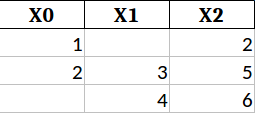

In [8]:
# 将二维数组保存到 csv 文件
cn_data.to_csv('cn_data_out.csv', encoding = "utf8")

In [9]:
# 再重新载入检验一下
cn_data_in = pd.read_csv("cn_data_out.csv")
cn_data_in

,Unnamed: 0,日期,总量
0,0,2013-01-24,323
1,1,2013-01-25,233
2,2,2013-01-26,433
3,3,2013-01-27,555
4,4,2013-01-28,123
5,5,2013-01-29,0
6,6,2013-01-30,221


In [1]:
from sklearn.datasets import load_iris

In [2]:
iris = load_iris()

In [3]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  